# Dependencias

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

N = 1000
x = np.linspace(-5,5, num=N)

# FUNCIONES  DE ACTIVACION


## Función lineal
$$y=mx+b$$

Sirve para mantener valores a lo largo de un proceso (predecir).

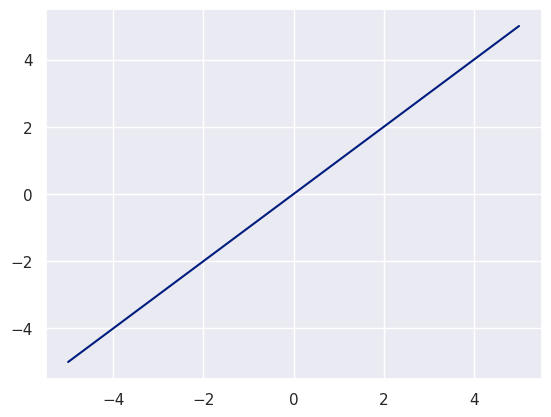

In [92]:
def f(x):
  return x

plt.plot(x, f(x))
plt.grid()

## Función escalón o de Heaviside
$$H(x) = 
     \begin{cases}
        0, &\quad \text{para, } x < 0 \\
        1,  &\quad\text{para. } x \ge 0 \\
     \end{cases}
$$

Clasificacion categorica, valores binarios.

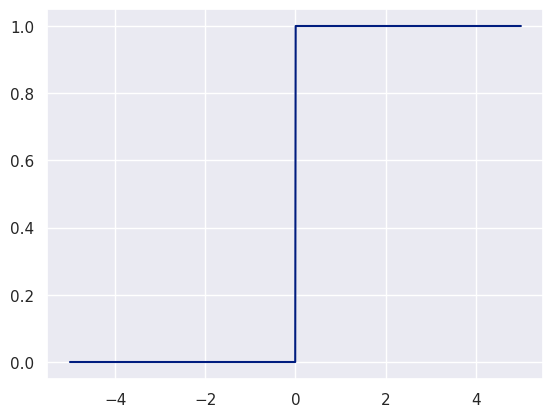

In [93]:
def H(x):
  Y = np.zeros(len(x))
  for idx,x in enumerate(x):
    if x>=0:
      Y[idx]=1
  return Y
    

N=1000


y = H(x)

plt.plot(x,y)
plt.grid()

## Función sigmoide

$$f(x)=\frac{1}{1-e^{-x}}$$

Regresion logistica

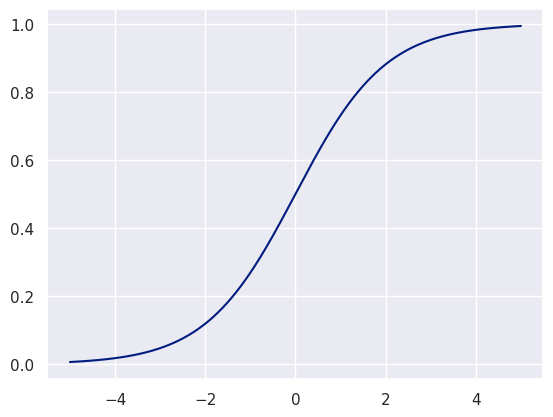

In [94]:
def f(x):
  return 1/(1 + np.exp(-x))
    

N=1000

y = f(x)

plt.plot(x,y)
plt.grid()

## Función tangente hiperbólica

$$f(x)=\frac{2}{1+e^{-2x}}-1$$

Funcion de escalamiento

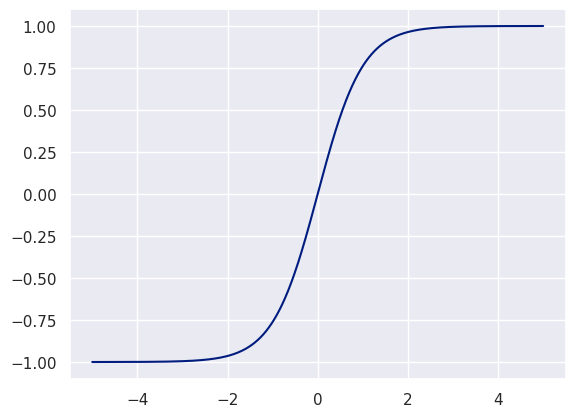

In [95]:
def f(x):
  return np.tanh(x)
    

N=1000

y = f(x)

plt.plot(x,y)
plt.grid()

## Función ReLU

$$R(x)=max(0,x)$$

Si un valor es mayor a cero --- > y = x
Simulación de “neuronas muertas”

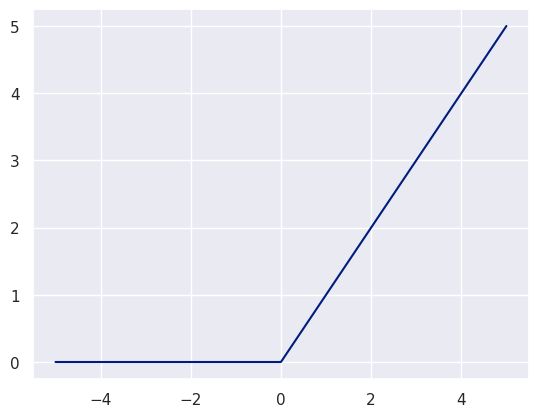

In [96]:
def f(x):
  return np.maximum(x,0)
    

N=1000

y = f(x)

plt.plot(x,y)
plt.grid()

# TESTING

Regresion lineal simple (ejemplo)

In [97]:
x = np.array([1.2,2, 3.2,2.5,5,6,4,8])
y = np.array([2,3,3.4,3.1,4,4.7,3.8,7])

df = pd.DataFrame({
                "x":x,
                "y":y
                })
df.sort_values("x", inplace=True)
df

,x,y
0,1.2,2.0
1,2.0,3.0
3,2.5,3.1
2,3.2,3.4
6,4.0,3.8
4,5.0,4.0
5,6.0,4.7
7,8.0,7.0


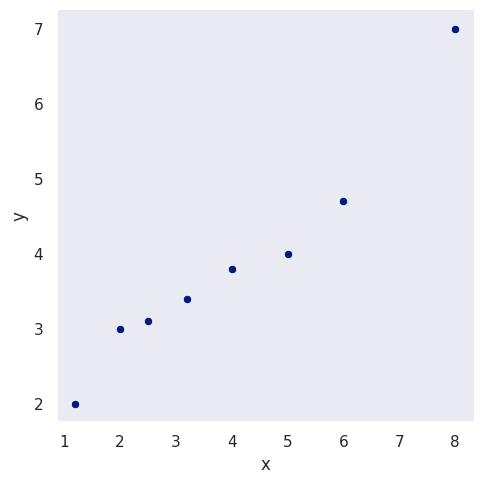

In [98]:
sns.set(style='dark',palette='dark',font_scale=1)
sns.relplot(x="x",y="y",data = df)

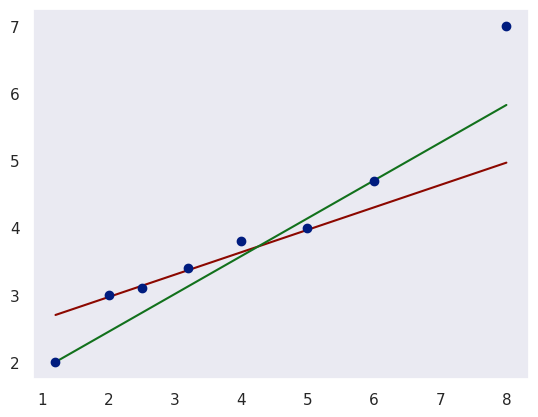

In [109]:
# Manual version
line = lambda x: (1/3)*x + 2.3
x = df["x"].values
y = [line(n) for n in x]
df_line1 = pd.DataFrame({
                        "x":x,
                        "y":y
                        })

line = lambda x: ((2.7/4.8)* x) + (4.7- (2.7/4.8) * 6)
y = [line(n) for n in x]
df_line2 = pd.DataFrame({
                        "x":x,
                        "y":y
                        })

plt.subplot(1,1,1)
plt.plot(df_line1["x"].values,df_line1["y"].values, "r-")
plt.plot(df_line2["x"].values,df_line2["y"].values, "g-")
plt.plot(df["x"].values,df["y"].values, "bo")

In [115]:
# Analizing each line
def line_regression(line):
    v = 0
    n = df['y'].values
    for index,value in enumerate(n):
        v += (line['y'].values[index] - value)**2
    return v/len(n)

print(f'Line 1: {line_regression(df_line1)}')
print(f'Line 2: {line_regression(df_line2)}')
# SORPRENDENTEMENTE LA SEGUNDA LINEA ES MÁS PRECISA QUE LA PRIMERA (ERROR POR DEBAJO)

Line 1: 0.6020833333333333
Line 2: 0.24553222656250007


<AxesSubplot: xlabel='x', ylabel='y'>

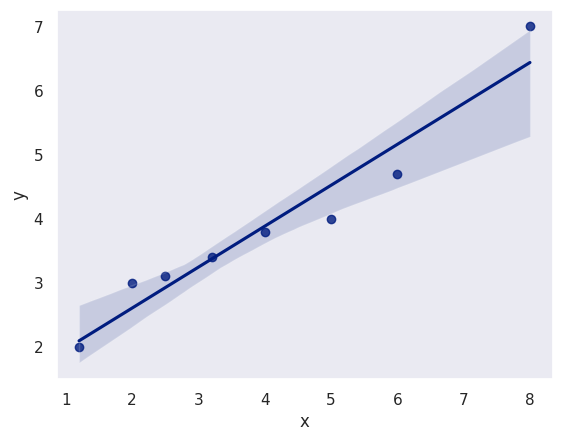

In [ ]:
#LA RECTA IDEAL
sns.set(style='dark',palette='dark',font_scale=1)
fig, axes = plt.subplots(1, 1)
sns.regplot(x="x",y="y",data = df)
